# Case 1: Telco Customer Churn
"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets](
https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)

### Import the data
The URL is a Google Drive link set to allow anyone with the link to view. This is a useful block of code to keep nearby. The only piece that changes is the value of the "orig_url".   

In [28]:
import pandas as pd
import requests
from io import StringIO

orig_url="https://drive.google.com/file/d/18e7X8-KyzlX6K1P8sujnVDVtERgsWD9P/view?usp=sharing"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text

csv_raw = StringIO(url)
telco = pd.read_csv(csv_raw)
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,...,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,...,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,...,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,...,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,...,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


### Import some useful libraries

In [29]:
import numpy as np # array operations
import pandas as pd # data processing
import matplotlib.pyplot as plt # visuals
import seaborn as sns # visuals
import warnings
warnings.filterwarnings("ignore") # suppress warnings for readability

### 1. Data Exploration

#### 1.a. Determine the shape of the data.

In [30]:
# find the shape of the telco data set.
telco.shape

(3333, 21)

#### 1.b. What do the numbers ```(3333, 21)``` tell you?
There are 3333 rows and 21 columns in the data frame.

#### 1.c. Deterimine whether or not there are any missing values.

In [31]:
telco.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

#### 1.d. Determine the count of each of the Churn  (target variable) categories ('yes', 'no'). Use the ```value_counts()``` method.

In [32]:
# separate churn
telco['Churn'].value_counts()

Churn
no     2850
yes     483
Name: count, dtype: int64

#### 1.e. Create a histogram of the 'Account_Length'. Use the Seaborn `distplot()` method.

<Axes: xlabel='Account_Length', ylabel='Density'>

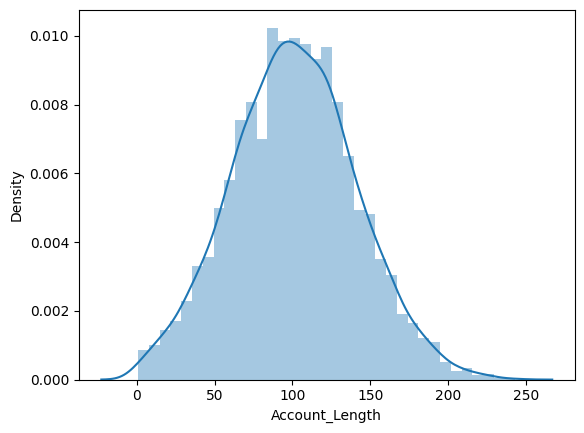

In [33]:
import matplotlib as plt
import seaborn as sns
sns.distplot(telco['Account_Length'])

#### 1.f. Create a boxplot of the Account_Length by Churn status.

<Axes: xlabel='Churn', ylabel='Account_Length'>

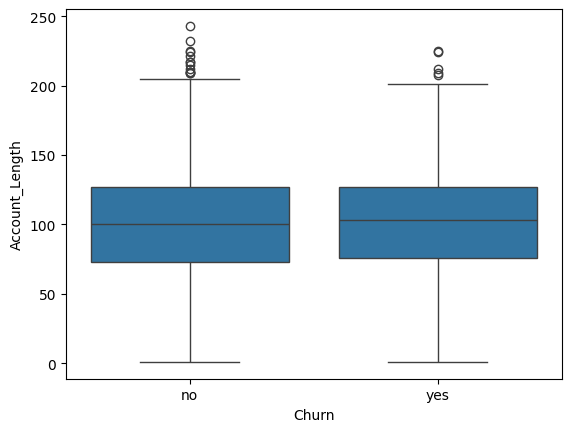

In [34]:
sns.boxplot(x='Churn', y='Account_Length', data=telco)

### 1.g. Describe any patterns in Churn based on tenure.
There's significantly more plot points above 200 for the no's than for yes's.













### 2. Data Preprocessing

#### 2.a. Determine the data types for all of the variables in the telco data set. Use the `dtypes` attribute.

In [35]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

#### 2.b. Based on the results above, which 5 variables require modification before a model can be built from this data set?
(double click to edit)

What do the ```Churn``` values look like?

In [36]:
telco['Churn'].head()

0    no
1    no
2    no
3    no
4    no
Name: Churn, dtype: object

Replace all of the ```'no'``` values with 0 and all of the ```'yes'``` values with 1.

In [37]:
telco['Churn']=telco['Churn'].replace({'no':0, 'yes':1})
telco['Churn'].head()

0    0
1    0
2    0
3    0
4    0
Name: Churn, dtype: int64

What do the ```'Intl_Plan'``` values look like?

In [38]:
telco['Intl_Plan'].head()

0     no
1     no
2     no
3    yes
4    yes
Name: Intl_Plan, dtype: object

Replace all of the ```'no'``` values with 0 and all of the ```'yes'``` values with 1.

In [39]:
telco['Intl_Plan']=telco['Intl_Plan'].replace({'no':0, 'yes':1})
telco['Intl_Plan'].head()

0    0
1    0
2    0
3    1
4    1
Name: Intl_Plan, dtype: int64

#### 2.c. What do the ```'Vmail_Plan'``` values look like?

In [40]:
telco['Vmail_Plan'].head()

0    yes
1    yes
2     no
3     no
4     no
Name: Vmail_Plan, dtype: object

#### 2.d. Replace all of the ```'no'``` values with 0 and all of the ```'yes'``` values with 1 for the ```'Vmail_Plan'``` data.

In [41]:
telco['Vmail_Plan']=telco['Vmail_Plan'].replace({'no':0, 'yes':1})
telco['Vmail_Plan'].head()

0    1
1    1
2    0
3    0
4    0
Name: Vmail_Plan, dtype: int64

Re-examine the data types of the telco data.

In [42]:
telco.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn               int64
Intl_Plan           int64
Vmail_Plan          int64
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

What do the ```'State'``` values look like?

In [43]:
telco['State'].head()

0    KS
1    OH
2    NJ
3    OH
4    OK
Name: State, dtype: object

Use the Pandas ```get_dummies``` method to create a column of indicators for each state.

In [44]:
telco=pd.get_dummies(data=telco, columns=['State'])
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,False,False,False,False,False,False,False,False,False,False


#### 2.e. Remove the `Phone` variable from the telco data. Use the Pandas `drop()` method.

In [45]:
# drop Phone
telco.drop(['Phone'], axis=1, inplace=True)


Examine the first few rows of the data set.

In [46]:
telco.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,...,False,False,False,False,False,False,False,False,False,False
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,...,False,False,False,False,False,False,False,False,False,False


### 3. Attribute Selection (abbreviated)

Find the correlations for the quantitative variables.

In [47]:
corr=telco[['Account_Length','Vmail_Message','Day_Mins','Eve_Mins','Night_Mins','Intl_Mins','CustServ_Calls','Day_Calls','Day_Charge','Eve_Calls','Eve_Charge','Night_Calls','Night_Charge','Intl_Calls','Intl_Charge']].corr()
corr

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
Account_Length,1.000000,-0.004628,0.006216,-0.006757,-0.008955,0.009514,-0.003796,0.038470,0.006214,0.019260,-0.006745,-0.013176,-0.008960,0.020661,0.009546
Vmail_Message,-0.004628,1.000000,0.000778,0.017562,0.007681,0.002856,-0.013263,-0.009548,0.000776,-0.005864,0.017578,0.007123,0.007663,0.013957,0.002884
Day_Mins,0.006216,0.000778,1.000000,0.007043,0.004323,-0.010155,-0.013423,0.006750,1.000000,0.015769,0.007029,0.022972,0.004300,0.008033,-0.010092
Eve_Mins,-0.006757,0.017562,0.007043,1.000000,-0.012584,-0.011035,-0.012985,-0.021451,0.007050,-0.011430,1.000000,0.007586,-0.012593,0.002541,-0.011067
Night_Mins,-0.008955,0.007681,0.004323,-0.012584,1.000000,-0.015207,-0.009288,0.022938,0.004324,-0.002093,-0.012592,0.011204,0.999999,-0.012353,-0.015180
Intl_Mins,0.009514,0.002856,-0.010155,-0.011035,-0.015207,1.000000,-0.009640,0.021565,-0.010157,0.008703,-0.011043,-0.013605,-0.015214,0.032304,0.999993
CustServ_Calls,-0.003796,-0.013263,-0.013423,-0.012985,-0.009288,-0.009640,1.000000,-0.018942,-0.013427,0.002423,-0.012987,-0.012802,-0.009277,-0.017561,-0.009675
Day_Calls,0.038470,-0.009548,0.006750,-0.021451,0.022938,0.021565,-0.018942,1.000000,0.006753,0.006462,-0.021449,-0.019557,0.022927,0.004574,0.021666
Day_Charge,0.006214,0.000776,1.000000,0.007050,0.004324,-0.010157,-0.013427,0.006753,1.000000,0.015769,0.007036,0.022972,0.004301,0.008032,-0.010094
Eve_Calls,0.019260,-0.005864,0.015769,-0.011430,-0.002093,0.008703,0.002423,0.006462,0.015769,1.000000,-0.011423,0.007710,-0.002056,0.017434,0.008674


#### 3.a. Create a heatmap of the correlations using the Seaborn `heatmap()` method.

<Axes: >

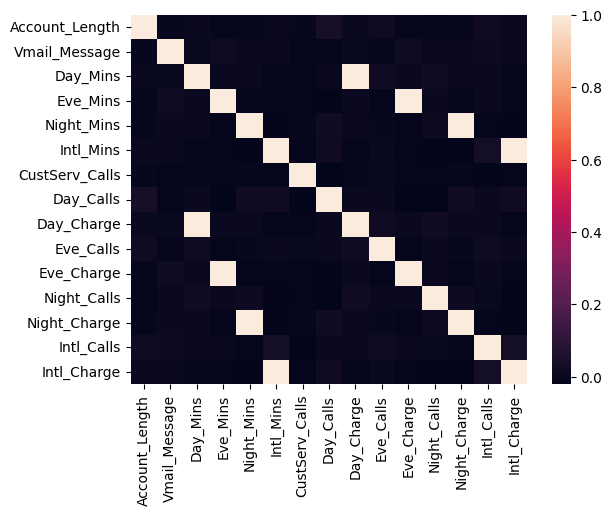

In [48]:
import seaborn as sns
sns.heatmap(corr)

#### 3.b. Based on the correlation analysis, which variables appear to be the most closely associated?
Day Charges

#### 3.c. What could be done to eliminate redundancy in the data?
Eliminate all minutes

### 4. Building the Model

Separate the collection of feature variables from the target variable.

#### 4.a. Use the Pandas `drop()` method to remove the `Churn` data from the telco data set and store the results as `features`.

In [49]:
features=telco.drop(['Churn'], axis=1)

#### 4.b. Store the telco Churn data as `target`.

In [50]:
target = telco['Churn']

#### 4.c. Create the four data sets `X_train, X_test, y_train, y_test` using the `train_test_split` method from `sklearn`.

In [51]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

#### 4.d. Build a Logistic regression model by fitting this model to the X and y training data.

In [52]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate the classifier
clf = LogisticRegression()

# Fit the classifier
clf.fit(X_train, y_train)

LogisticRegression()

#### 4.e. Use the classifier to predict the target values based on the X testing data.

In [53]:
# Make predictions using the collection of features reserved in X_test
y_pred = clf.predict(X_test)

### 5. Model Evaluation

#### 5.a. Use the `score()` method with the testing data (`X_test` and `y_test`) to determine the model's accuracy.

In [54]:
clf_score = clf.score(X_test, y_test)
print(clf_score)

0.8500749625187406


#### 5.b. Briefly interpret the score of this classifier.
The logistic regression model achieved an accuracy of 85.09% on the test data. This means the model correctly predicted whether a customer churned or not in approximately 85 out of 100 cases. While this is a strong result, further evaluation using other metrics like precision, recall, or a confusion matrix would give a more complete view of the model’s performance — especially if the dataset is imbalanced.